# 課題8

そのまま課題ファイルで編集しないでください。課題ファイルを複製してから課題を回答してください。

In [3]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/lvzeyu/css_tohoku/master/css_tohoku/draft/Data/titanic.csv")

## 課題1

以下の図を再現してください

- 年齢の分布を、異なる階級幅を使って、4つのサブプロットをわけて描画する
   - 階級幅を適当で決めてよい
- 各サブプロットには、
    - x軸ラベル、y軸ラベル、サブプロット番号(a-d)を指定する
    - 水平方向のグリッド線を追加する
    - ヒストグラムの色を`lightblue`に変更する

![](./Figure1.png)

C:\Users\kanob\AppData\Local\Temp\ipykernel_21456\1062156520.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)


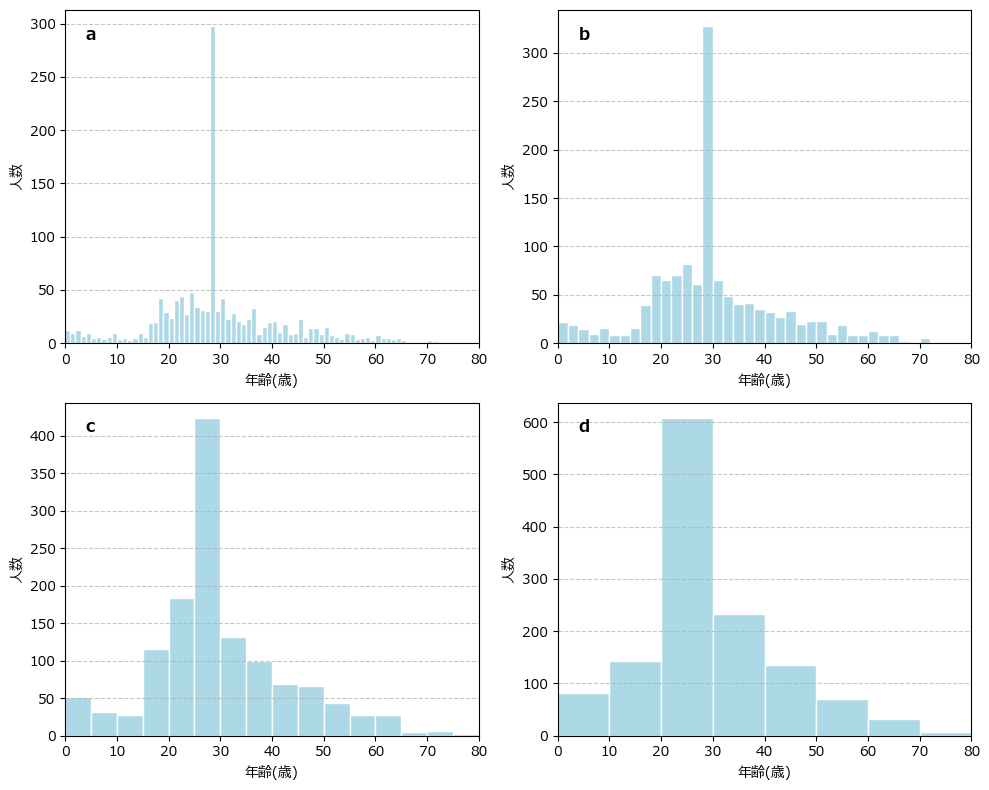

In [9]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Meiryo'
plt.rcParams['axes.unicode_minus'] = False

df['age'].fillna(df['age'].median(), inplace=True)

bins_a = np.arange(0, 85, 1)  # 階級幅1
bins_b = np.arange(0, 85, 2)  # 階級幅2
bins_c = np.arange(0, 85, 5)  # 階級幅5
bins_d = np.arange(0, 85, 10) # 階級幅10

subplot_labels = ['a', 'b', 'c', 'd']
bins_list = [bins_a, bins_b, bins_c, bins_d]

fig, axes = plt.subplots(2, 2, figsize=(10, 8)) 
axes = axes.flatten() 

for i, ax in enumerate(axes):
    # ヒストグラムの描画
    ax.hist(df['age'], bins=bins_list[i], color='lightblue', edgecolor='white')

    # x軸ラベル、y軸ラベルの設定
    ax.set_xlabel('年齢(歳)')
    ax.set_ylabel('人数')

    # 番号 (a-d) の追加
    ax.text(0.05, 0.95, subplot_labels[i], transform=ax.transAxes,
            fontsize=12, fontweight='bold', va='top', ha='left')

    # 水平方向の線を追加
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # x軸の範囲を固定 (0-80歳)
    ax.set_xlim(0, 80)

# レイアウトの調整
plt.tight_layout()
plt.show()

## 課題2

以下の図を再現してください

- 男性乗客と女性乗客の年齢の分布をそれぞれ描画する
- 全乗客の年齢分布を示す灰色ヒストグラムも描画する
- 図のタイトル、x軸ラベル、y軸ラベル、凡例を設定する

![](./Figure2.png)

C:\Users\kanob\AppData\Local\Temp\ipykernel_21456\1074519797.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)


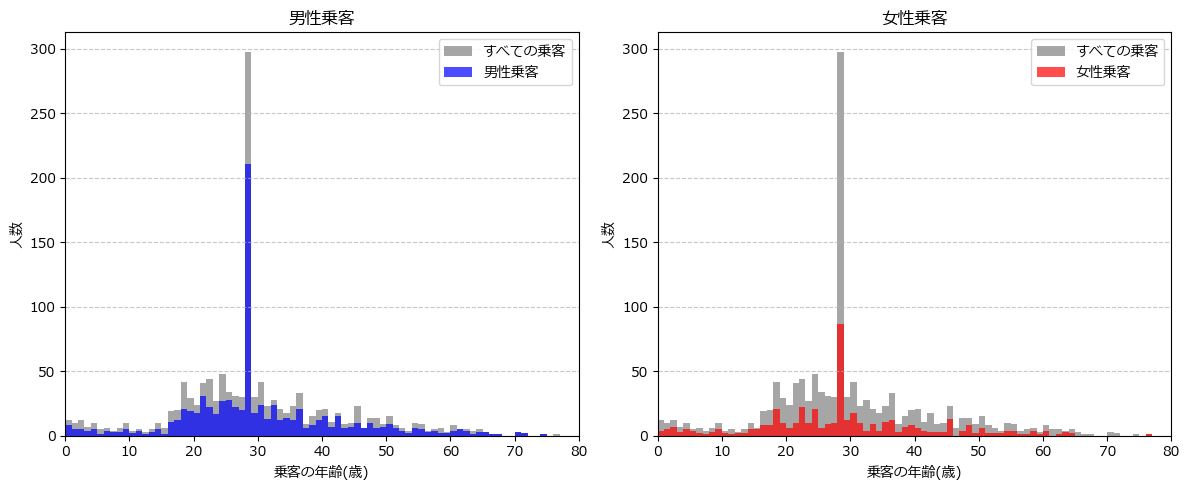

In [10]:
import matplotlib.font_manager as fm

# 年齢の欠損値を中央値で補完
df['age'].fillna(df['age'].median(), inplace=True)

# 性別でデータを分割
male_df = df[df['sex'] == 'male']
female_df = df[df['sex'] == 'female']

# 階級幅の設定
# np.arange(0, 85, 1) 1刻みの配列を作成
bins = np.arange(0, 85, 1)

# 2つのプロットを作成
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# --- 左側(男性乗客) ---
ax1 = axes[0]
ax1.hist(df['age'], bins=bins, color='gray', alpha=0.7, label='すべての乗客') # 全乗客を灰色で
ax1.hist(male_df['age'], bins=bins, color='blue', alpha=0.7, label='男性乗客') # 男性乗客を青色で
ax1.set_title('男性乗客')
ax1.set_xlabel('乗客の年齢(歳)')
ax1.set_ylabel('人数')
ax1.set_xlim(0, 80)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.legend() # 凡例を表示

# --- 右側(女性乗客) ---
ax2 = axes[1]
ax2.hist(df['age'], bins=bins, color='gray', alpha=0.7, label='すべての乗客') # 全乗客を灰色で
ax2.hist(female_df['age'], bins=bins, color='red', alpha=0.7, label='女性乗客') # 女性乗客を赤色で
ax2.set_title('女性乗客')
ax2.set_xlabel('乗客の年齢(歳)')
ax2.set_ylabel('人数')
ax2.set_xlim(0, 80)
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.legend() # 凡例を表示

# レイアウトの調整
plt.tight_layout()
plt.show()